In [1]:
%matplotlib inline
import os
from os.path import join as pjoin
from tifffile import imread, imwrite, TiffFile
import numpy as np
import shutil
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import cv2
from tqdm import tqdm
import subprocess
from wf_utils import *
from wfield_utils import *
# from multi_load_images import *


In [2]:
### Set the file path

# path_0: including one-day recording files
# path_1: including every stimuli
path_0 = r"/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41"
path_1_ = os.listdir(path_0)
# 筛选出文件夹
path_1 = [folder for folder in path_1_ if os.path.isdir(pjoin(path_0, folder))]
path_all = []
for path in path_1:
    path_all.append(pjoin(path_0, path))

print('All the file path:\n'+'\n'.join(path_all))


All the file path:
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/baseline
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/moving-bar
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-reverse
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/no-light
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/retinotopy
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound


In [3]:
### re-organize files

for path in path_all:
    if not os.path.exists(pjoin(path, 'raw')):
        os.mkdir(pjoin(path, 'raw'))
    if not os.path.exists(pjoin(path, 'process/')):
        os.mkdir(pjoin(path, 'process/'))
        
for path in path_all:
    files = glob(pjoin(path, '202?????-??????*'))
    for file in files:
        shutil.move(file, pjoin(path, 'raw', os.path.basename(file)))
        print('moving',file)

print('Moving raw data folders all finished!')


Moving raw data folders all finished!


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/baseline
experiments:
['20241219-182248']
merged 20241219-182248 has existed


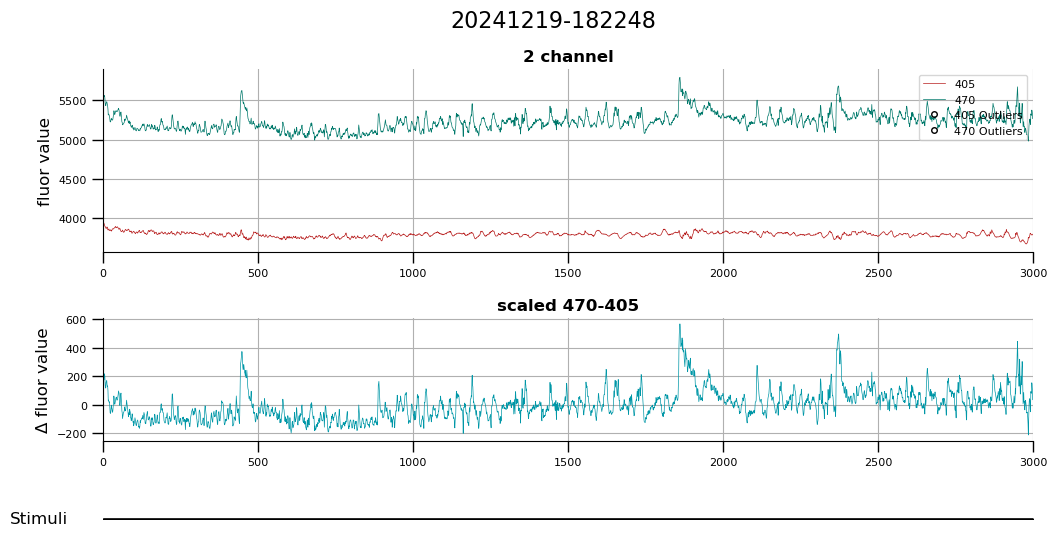


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/baseline


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/moving-bar
experiments:
['20241219-204729']
merged 20241219-204729 has existed


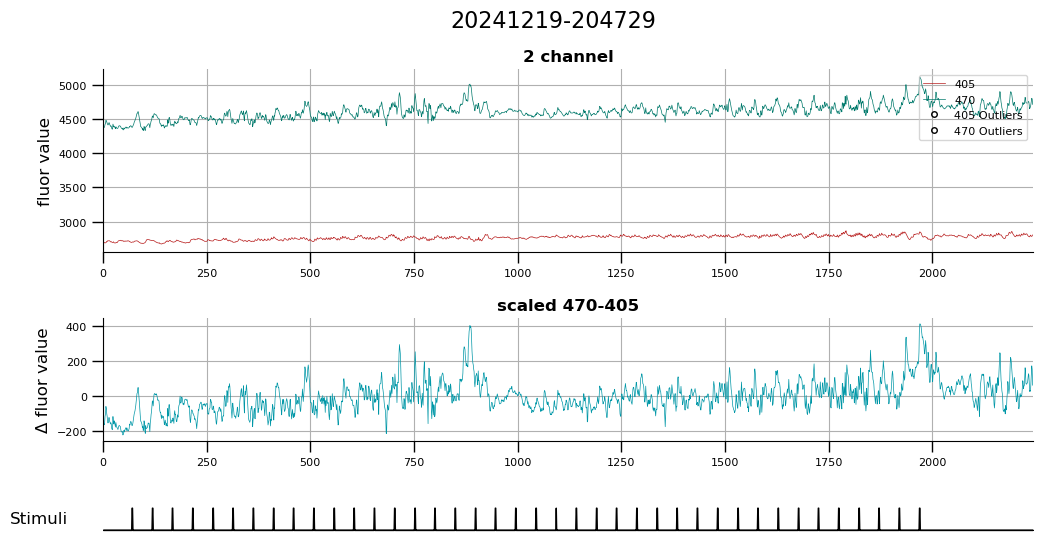


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/moving-bar


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie
experiments:
['20241219-192319', '20241219-182821', '20241219-183603']
merged 20241219-192319 has existed


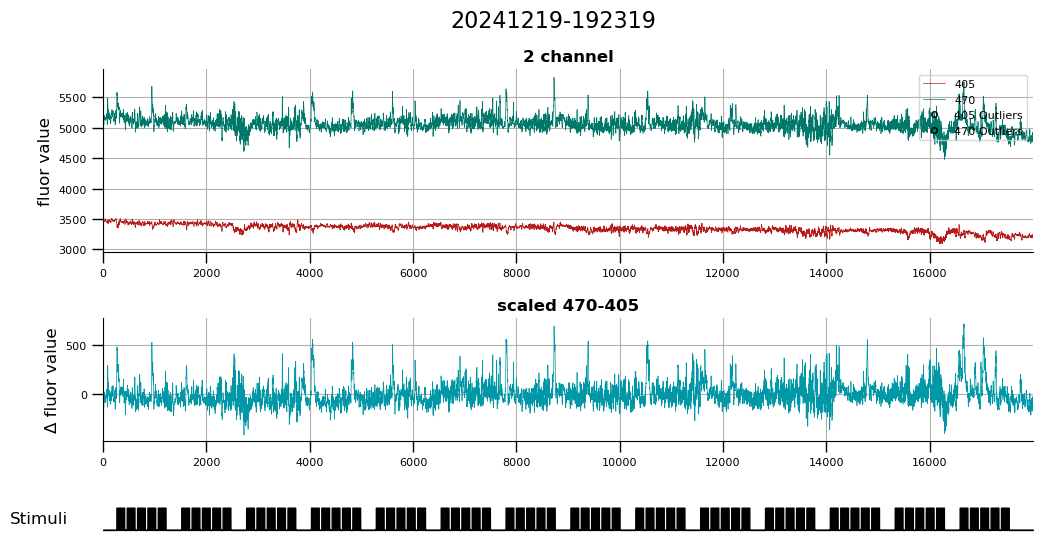

merged 20241219-182821 has existed


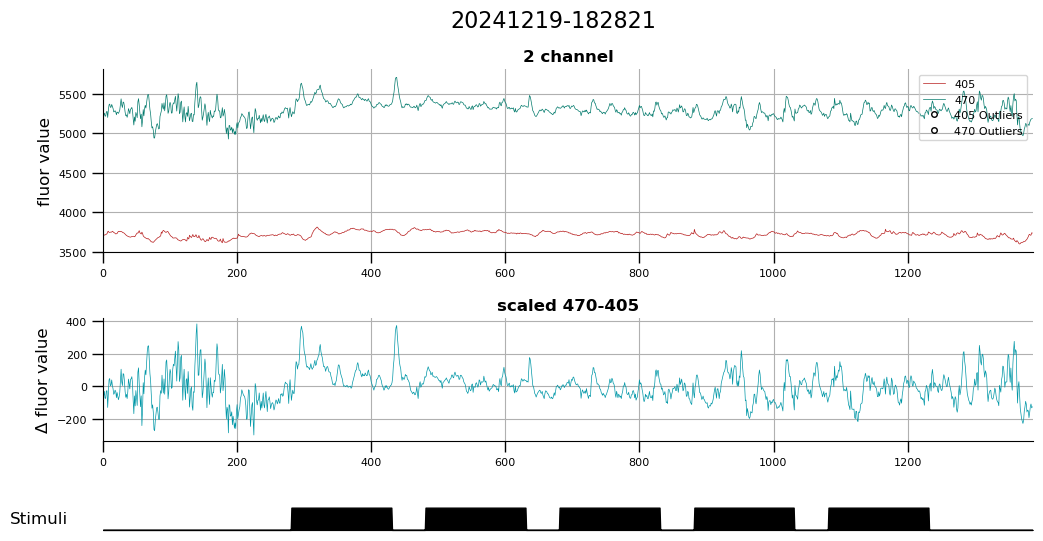

merged 20241219-183603 has existed


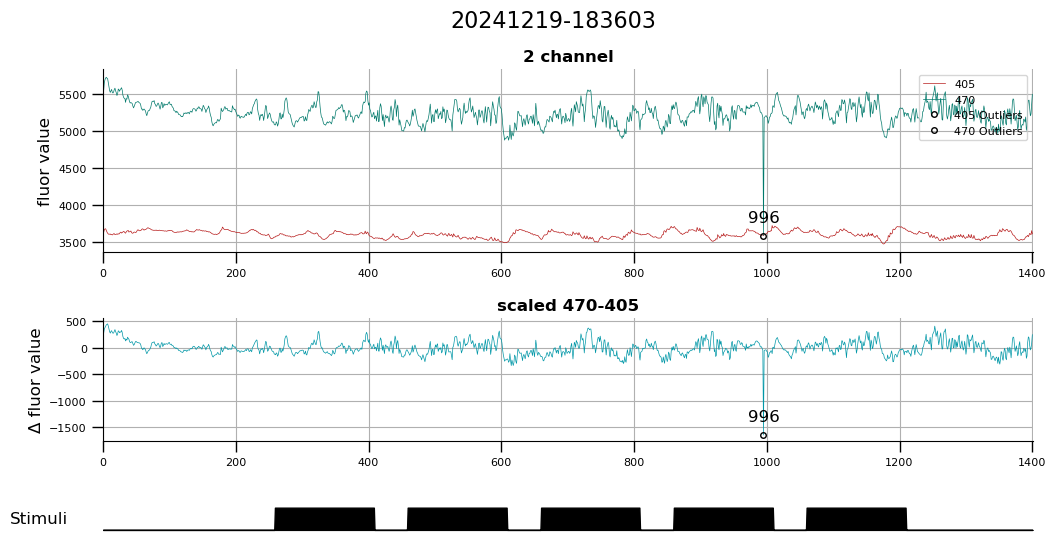


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert
experiments:
['20241219-201009', '20241219-231104']
merged 20241219-201009 has existed


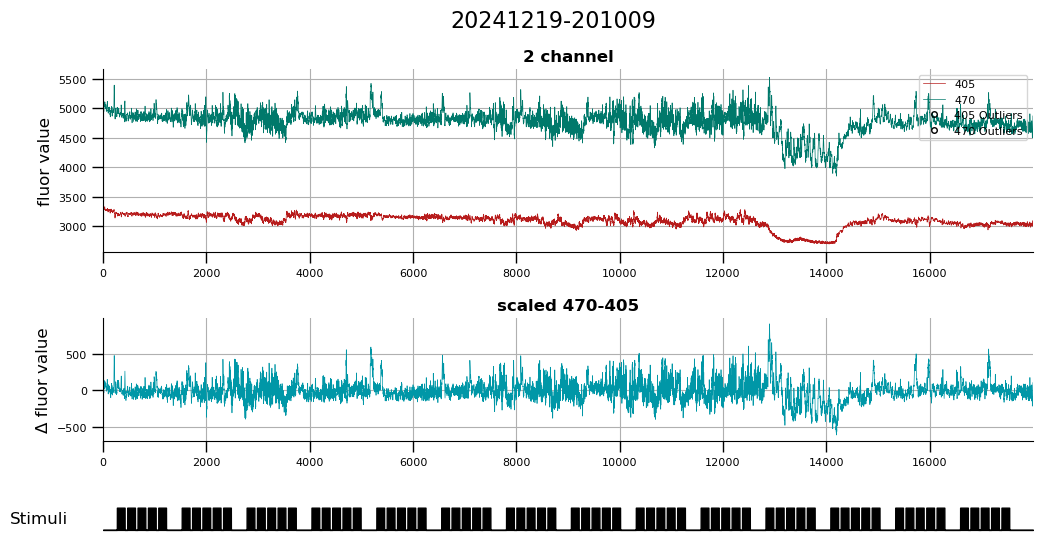

merged 20241219-231104 has existed


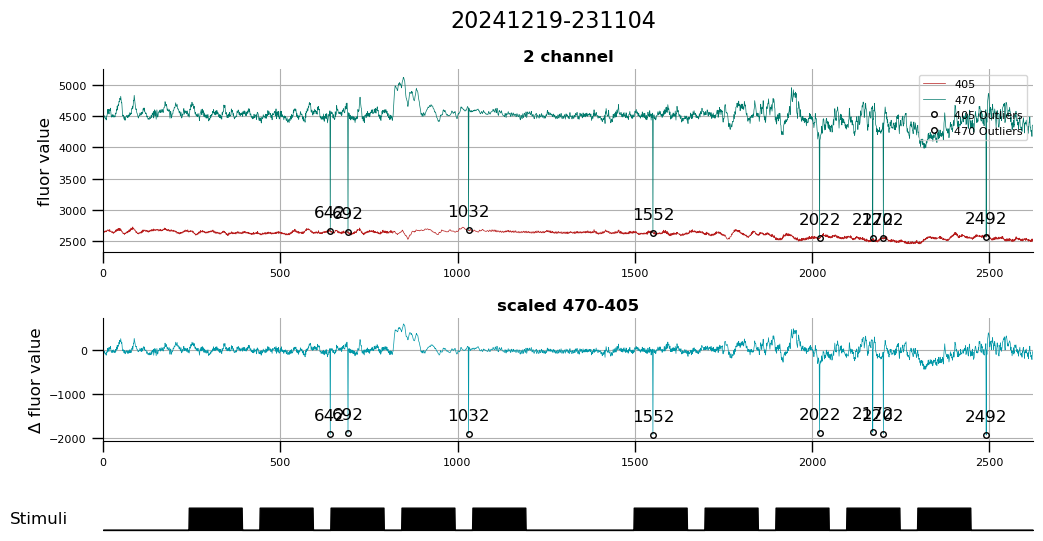


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-reverse
experiments:
['20241219-210558']
merged 20241219-210558 has existed


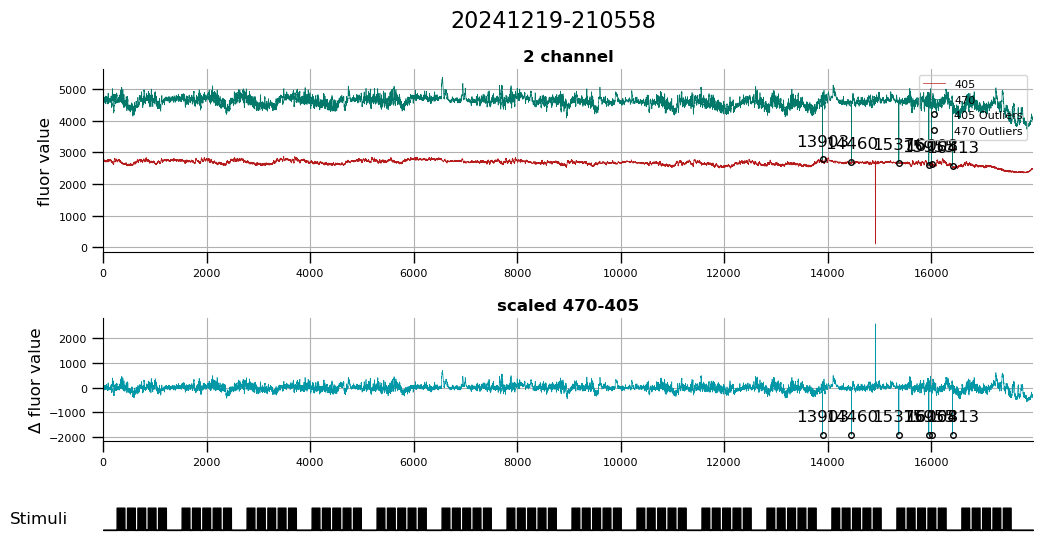


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-reverse


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/no-light
experiments:
['20241219-181607']
merged 20241219-181607 has existed


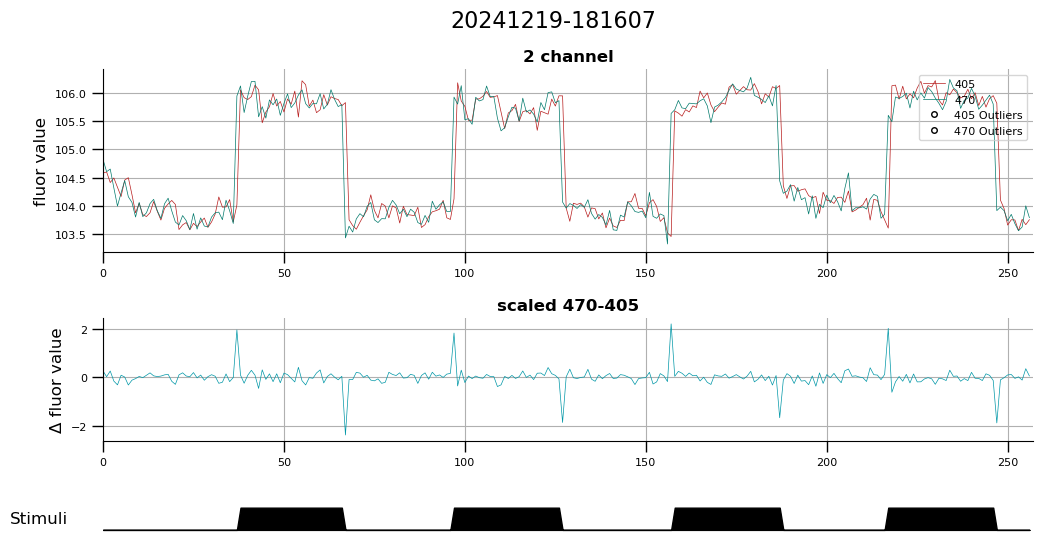


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/no-light


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/retinotopy
experiments:
['20241219-184656']


/home/lzx/.conda/envs/wfield/lib/python3.9/site-packages/tifffile/tifffile.py:1569: UserWarning: <tifffile.TiffWriter '20241219-184656-merged.tif'> writing nonconformant BigTIFF ImageJ
  warnings.warn(


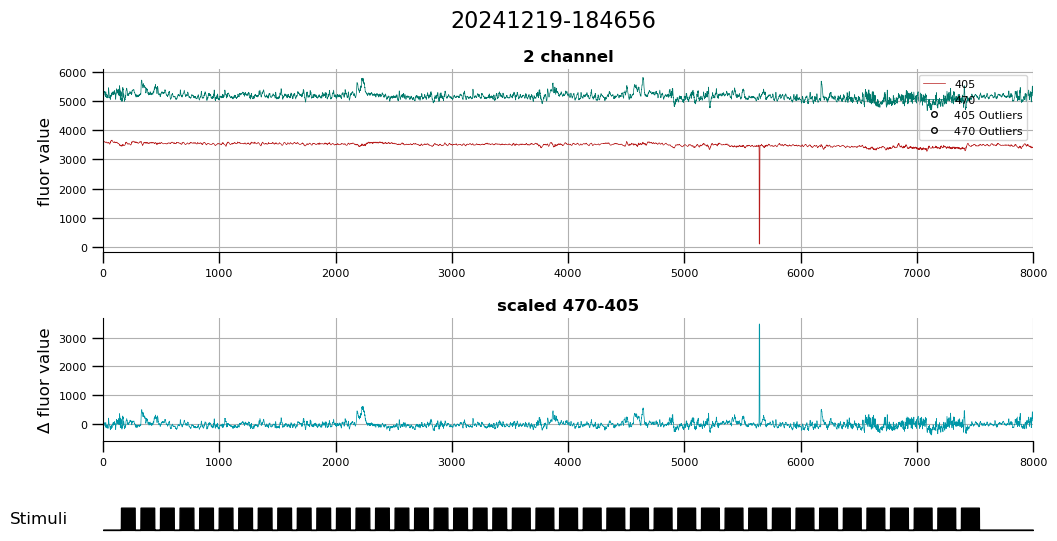


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/retinotopy


Path: /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound
experiments:
['20241219-225830', '20241219-225232', '20241219-230423', '20241219-230254']


/home/lzx/.conda/envs/wfield/lib/python3.9/site-packages/tifffile/tifffile.py:1569: UserWarning: <tifffile.TiffWriter '20241219-225830-merged.tif'> writing nonconformant BigTIFF ImageJ
  warnings.warn(


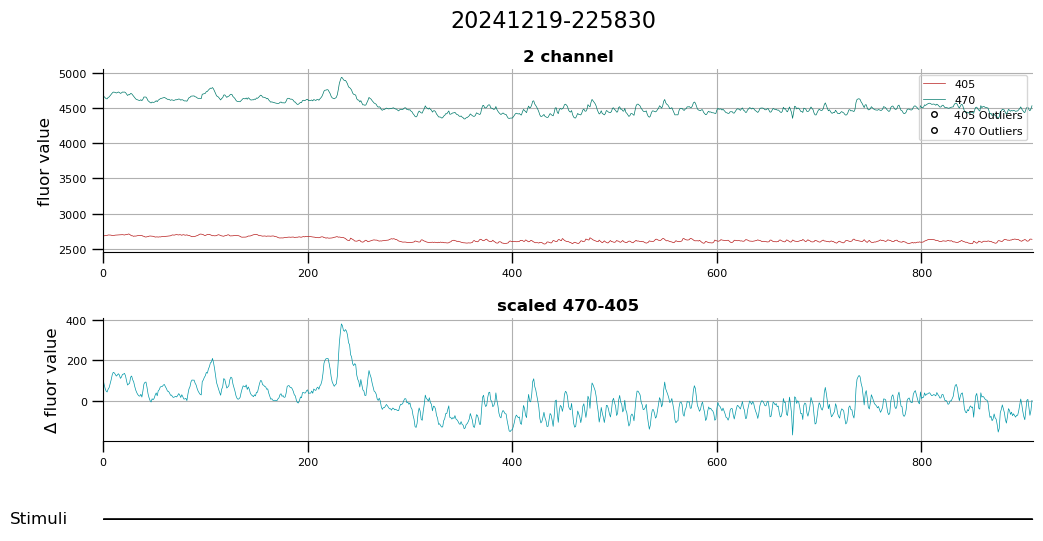

/home/lzx/.conda/envs/wfield/lib/python3.9/site-packages/tifffile/tifffile.py:1569: UserWarning: <tifffile.TiffWriter '20241219-225232-merged.tif'> writing nonconformant BigTIFF ImageJ
  warnings.warn(


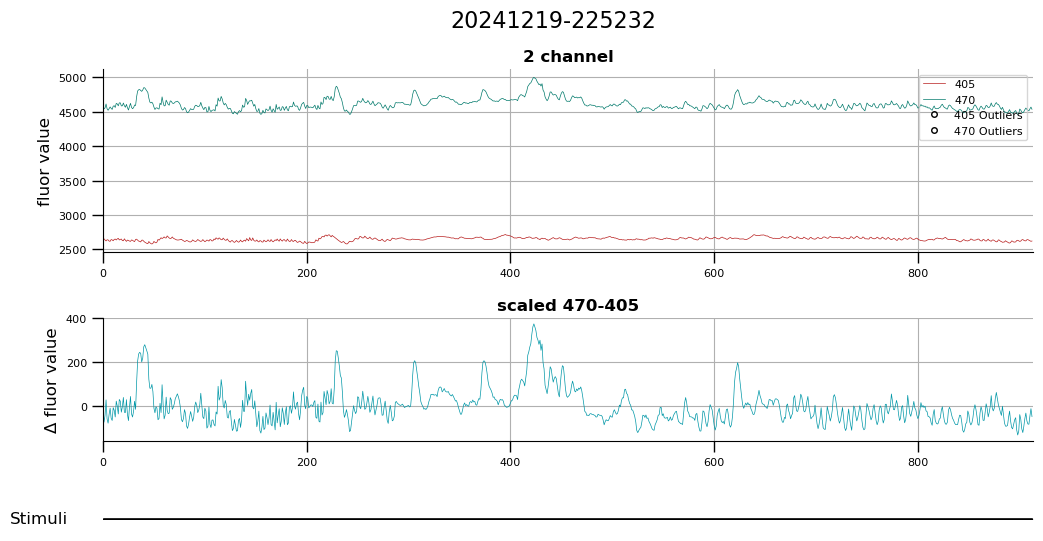

/home/lzx/.conda/envs/wfield/lib/python3.9/site-packages/tifffile/tifffile.py:1569: UserWarning: <tifffile.TiffWriter '20241219-230423-merged.tif'> writing nonconformant BigTIFF ImageJ
  warnings.warn(


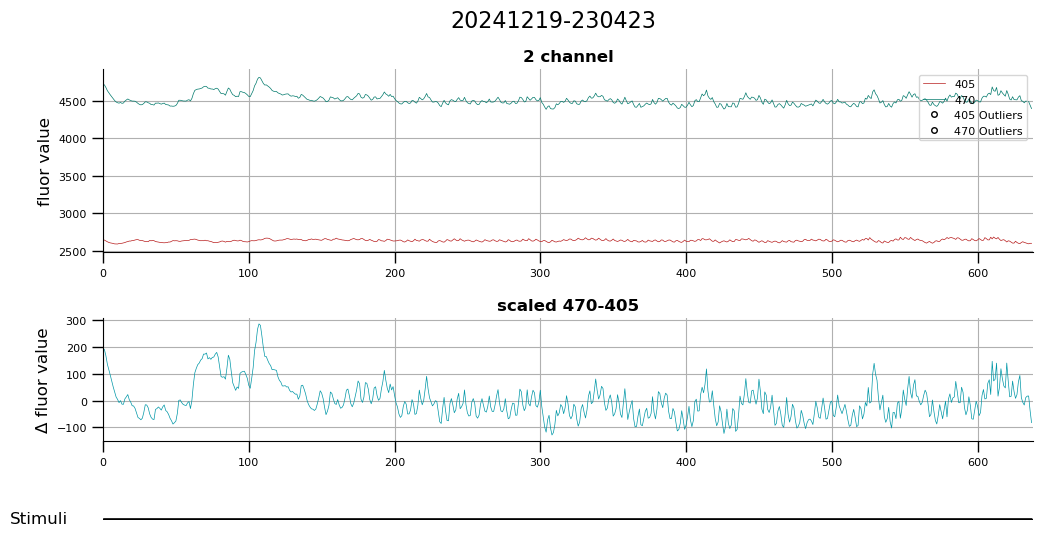

/home/lzx/.conda/envs/wfield/lib/python3.9/site-packages/tifffile/tifffile.py:1569: UserWarning: <tifffile.TiffWriter '20241219-230254-merged.tif'> writing nonconformant BigTIFF ImageJ
  warnings.warn(


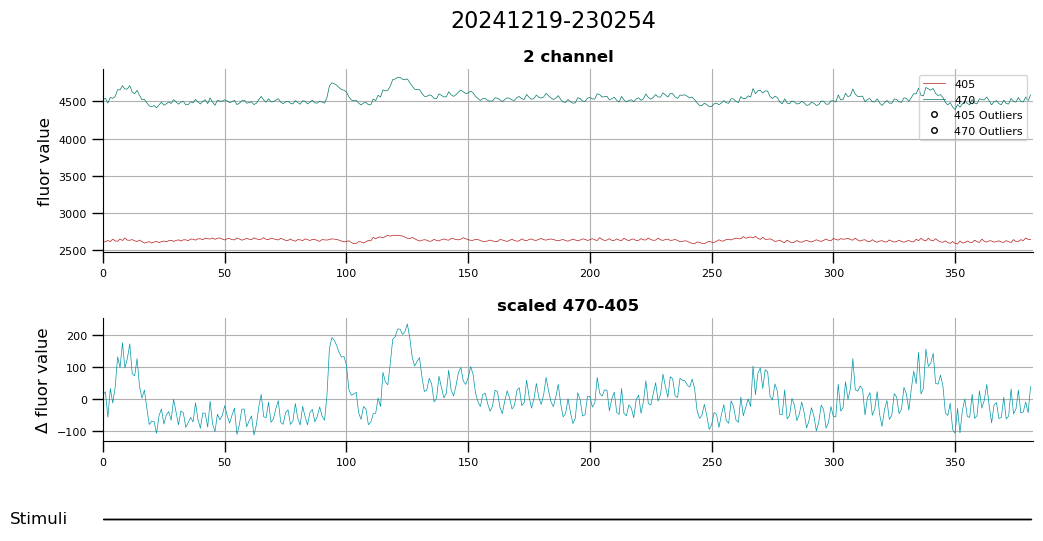


finished /home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound


All merging finished!


In [9]:
### generate 2-channel tif stack

def organize_tif(folder_path):
    folder_name = os.path.basename(folder_path)
    if os.path.exists(folder_path+'.tif'):
        print('importing {}.tif'.format(folder_path))
        image_stack = imread(folder_path+'.tif')
        print('finish importing {}.tif'.format(folder_path))
    else:
        image_path_ls = glob(pjoin(folder_path, '*.tif'))
        image_path_ls = sorted(image_path_ls, key = filename2int) # 确保图像帧按顺序排列
        image_stack = [imread(tiff) for tiff in log_progress(image_path_ls, name=folder_name)]  # 将多帧tif堆叠成数组
        # image_stack = multi_load_images(image_path_ls, n_thread=20)
    # rotated_images = [cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE) for frame in image_stack]   # 顺时针旋转图像90度
    # 计算并保存均值数据
    mean_values = [np.mean(frame) for frame in image_stack]
    output_value = pjoin(processPath, folder_name + "-Values.csv")
    np.savetxt(output_value, mean_values, delimiter=",")
    
    return np.array(image_stack)


for path in path_all:
    print("Path: "+ path)
    rawPath = pjoin(path, "raw")
    processPath = pjoin(path, "process")
    # 列出experiments
    items = glob(pjoin(rawPath, '202?????-??????-4*'))
    experiments = list(set([os.path.basename(item)[:15] for item in items]))
    print("experiments:")
    print(experiments)
    
    # 遍历每个experiment，merge channel
    for experiment in experiments:
        os.makedirs(pjoin(processPath, experiment+"-wfield"), exist_ok=True)
        mergePath = pjoin(processPath, experiment+"-wfield")
        merge_file = pjoin(mergePath, experiment+"-merged.tif")
        if not os.path.exists(merge_file):
            tif_405 = organize_tif(pjoin(rawPath, experiment + "-405"))
            tif_470 = organize_tif(pjoin(rawPath, experiment + "-470"))
            # 检查两个通道的深度是否一致
            if tif_405.shape[0] != tif_470.shape[0]:
                n_frames = min(tif_405.shape[0], tif_470.shape[0])
                tif_405 = tif_405[:n_frames]
                tif_470 = tif_470[:n_frames]
            # 将Tiff stack的数据从三维变成四维，不同通道使用第二维区分
            merged_tif = np.concatenate((tif_470[:, np.newaxis], tif_405[:, np.newaxis]), axis=1)
            # 将合并后的图像保存为一个2通道Tiff图像
            imwrite(merge_file, merged_tif, imagej=True, bigtiff=True)
                        
        else: print("merged "+experiment+" has existed")
        plotFluor(path, experiment)
        
    print("\nfinished "+ path+"\n\n")
    
print("All merging finished!")


In [10]:
# 列出所有已经合并通道的tiff的路径

path_wfield_all = glob(pjoin(path_0, '*/process/*-wfield'))
print('All the wfield-path:\n'+"\n".join(path_wfield_all))


All the wfield-path:
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/baseline/process/20241219-182248-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/moving-bar/process/20241219-204729-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie/process/20241219-183603-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie/process/20241219-192319-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie/process/20241219-182821-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert/process/20241219-201009-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert/process/20241219-231104-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-reverse/process/20241219-210558-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/no-light/process/20241219-181607-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/retinotopy/process/20241219-184656-wfield
/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound/process/20241219-225830-wfield
/h

In [15]:
# Create binary file
# Note: only one tif in the folder, and should no .bin file in the folder before running this cell
for path in path_wfield_all:
    print('\n\n'+path)
    _ls = os.listdir(path)
    if np.array([_.endswith('.bin') for _ in _ls]).any():
        print('!!! There are .bin files in the folder, please delete them before running!')
        continue
    if np.array([_.endswith('.tif') for _ in _ls]).sum() > 1:
        print('!!! There are more than one tif files in the folder, please check the folder!')
        continue
    tif_stack = TiffStack(glob(pjoin(path,'*-merged.tif')), nchannels=2) # set nchannels=1 for our 2 channel tif file
    print('The frames of the stack:', tif_stack.shape[0])
    if tif_stack.shape[0] == 0:
        print('The shape of the stack may be wrong!')
        continue
    else: 
        tif_stack.export_binary(foldername=path, basename='{}'.format(tif_stack.shape[0]))

print('finish generate binary file.')



/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/baseline/process/20241219-182248-wfield
!!! There are .bin files in the folder, please delete them before running!


/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/moving-bar/process/20241219-204729-wfield
!!! There are .bin files in the folder, please delete them before running!


/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie/process/20241219-183603-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]

The frames of the stack: 1401



Exporting binary:   0%|          | 0/3 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 3/3 [00:06<00:00,  2.25s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie/process/20241219-192319-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

The frames of the stack: 17999



Exporting binary:   0%|          | 0/36 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 36/36 [02:18<00:00,  3.86s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie/process/20241219-182821-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

The frames of the stack: 1387



Exporting binary:   0%|          | 0/3 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 3/3 [00:06<00:00,  2.25s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert/process/20241219-201009-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

The frames of the stack: 17998



Exporting binary:   0%|          | 0/36 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 36/36 [07:15<00:00, 12.08s/it]  




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-invert/process/20241219-231104-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

The frames of the stack: 2623



Exporting binary:   0%|          | 0/6 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 6/6 [00:13<00:00,  2.19s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/natural-movie-reverse/process/20241219-210558-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

The frames of the stack: 17967



Exporting binary:   0%|          | 0/36 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 36/36 [02:42<00:00,  4.51s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/no-light/process/20241219-181607-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00, 18.38it/s]

The frames of the stack: 257



Exporting binary:   0%|          | 0/1 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/retinotopy/process/20241219-184656-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

The frames of the stack: 8000



Exporting binary:   0%|          | 0/16 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 16/16 [00:52<00:00,  3.30s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound/process/20241219-225830-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

The frames of the stack: 909



Exporting binary:   0%|          | 0/2 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 2/2 [00:06<00:00,  3.24s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound/process/20241219-225232-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

The frames of the stack: 913



Exporting binary:   0%|          | 0/2 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 2/2 [00:06<00:00,  3.16s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound/process/20241219-230423-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00, 38.64it/s]

The frames of the stack: 638



Exporting binary:   0%|          | 0/2 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]




/home/lzx/data/WF_VC_liuzhaoxi/24.12.19_P41/sound/process/20241219-230254-wfield


Parsing tiffs: 100%|██████████| 1/1 [00:00<00:00, 37.87it/s]

The frames of the stack: 382



Exporting binary:   0%|          | 0/1 [00:00<?, ?it/s]

Loading 0


Exporting binary: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


### ********************************************************************************************************************
### 从这里开始用wfield软件做运动矫正、奇异值分解、血流动力学矫正。以下必须用wfield环境！！！
### ********************************************************************************************************************

In [16]:
# try wfield

! wfield -h

usage: wfield <command> [<args>]

The commands are:
    ncaas               Opens a gui to launch data on the neuroCAAS platform
    open                Opens a gui to look at the preprocessed data        
    open_raw            Opens a gui to look at the raw frames
    preprocess          Preprocess data in binary fornat
    motion              Registers data from a binary file
    decompose           Performs single value decomposition
    correct             Performs hemodynamic correction on dual channel data
    imager              
    imager_preprocess   Preprocesses data recorded with the WidefieldImager

wfield - tools to process widefield data

positional arguments:
  command     type wfieldtools <command> -h for help

optional arguments:
  -h, --help  show this help message and exit


In [11]:
# path_delete = glob(pjoin(path_0, '*/process/*-wfield/*.bin'))
# path_delete


In [12]:
# for file_delete in path_delete:
#     try:
#         os.remove(file_delete)
#         print(f"Deleted: {file_delete}")
#     except Exception as e:
#         print(f"Error deleting {file_delete}: {e}")

In [19]:
### 生成trial_onsets.npy

n_movie_rep = 5

for path_wfield in path_wfield_all:
    
    experiment = os.path.basename(path_wfield)[:15]
    rawPath = pjoin(path_wfield,'../../raw')
    merge_file = pjoin(path_wfield, experiment+"-merged.tif")
    n_frames = len(TiffFile(merge_file).pages)//2

    if os.path.exists(pjoin(rawPath, experiment + ".csv")):
        # generate trial_onsets.npy
        # trial_onsets.npy is a Nx3 array. The columns are: trial number, onset of the trial (frame index), offset of the trial.
        if not os.path.exists(pjoin(path_wfield, 'trials.csv')):
            stimfile = pd.read_csv(pjoin(rawPath, experiment + ".csv"), header=None).values
            stim_delay = pd.read_csv(pjoin(rawPath, experiment + "-470Timestamp.csv"), header=None).values
            stim_delay = int(stim_delay[0]/100)
            
            stim = np.zeros(n_frames)
            for i in range(n_frames):
                stim[i] = stimfile[(i * 100 + stim_delay), 0]
            single_0_indices = np.where((np.diff(np.append(stim, 0)) == 1) & (np.diff(stim, prepend=0) == -1))[0]
            single_1_indices = np.where((np.diff(np.append(stim, 0)) == -1) & (np.diff(stim, prepend=0) == 1))[0]
            stim[single_1_indices] = 0
            stim[single_0_indices] = 1
            
            onset = np.where(np.diff(stim) == 1)[0] + 1
            offset = np.where(np.diff(stim) == -1)[0] + 1
            trials_csv = np.stack((np.arange(len(onset)), onset, offset, offset-onset), axis=1)  # 这个用来自己检查一下以及自己后续分析
            np.savetxt(pjoin(path_wfield, "trials.csv"), trials_csv, delimiter=",")
            print("generate trials.csv of "+experiment)
            
            if 'retinotopy' or 'checkerboard-bar' in path_wfield:
                trial_onsets = np.stack((np.arange(len(onset)), onset - 30, offset), axis=1)  # 这个文件给wfield软件做SVD用
                np.save(pjoin(path_wfield, 'trial_onsets.npy'), trial_onsets)
            
            elif 'natural-movie' in path_wfield:
                n_movie = len(onset)//n_movie_rep
                trial_onsets = np.empty((n_movie,3))
                for i in range(n_movie):
                    trial_onsets[i] = [i, onset[i*n_movie_rep] - 100, offset[i*n_movie_rep]]
                np.save(pjoin(path_wfield, 'trial_onsets.npy'), trial_onsets)   # 这个文件给wfield软件做SVD用
            # elif 'speed' in path_wfield:
            #     trial_onsets = [0, onset[0] - 100, offset[0]]
            #     np.save(pjoin(path_wfield, 'trial_onsets.npy'), trial_onsets)   # 这个文件给wfield软件做SVD用
        else: print("trials.csv of "+experiment+" has existed")

    else: print(experiment, 'without stim-file, skip')
            
print("\nAll generation of trials-file finished!")


trials.csv of 20241219-182248 has existed
trials.csv of 20241219-204729 has existed
trials.csv of 20241219-183603 has existed
trials.csv of 20241219-192319 has existed
trials.csv of 20241219-182821 has existed
trials.csv of 20241219-201009 has existed
trials.csv of 20241219-231104 has existed
trials.csv of 20241219-210558 has existed
trials.csv of 20241219-181607 has existed
trials.csv of 20241219-184656 has existed
trials.csv of 20241219-225830 has existed
trials.csv of 20241219-225232 has existed
trials.csv of 20241219-230423 has existed
trials.csv of 20241219-230254 has existed

All generation of trials-file finished!


In [14]:
# 用wfield进行Motion correction, single value decomposition, hemodynamic correction。

for path_wfield in path_wfield_all:
    if len(glob(pjoin(path_wfield, '*-merged.tif'))) == 0:
        print(path_wfield,"can't find merged tiff file！\n")
    elif len(glob(pjoin(path_wfield, '*-merged.tif'))) > 1:
        print(path_wfield,"exist multiple merged tiff file！\n")
    elif os.path.exists(pjoin(path_wfield, 'SVTcorr.npy')):
        print(path_wfield,'analysis has been finished！\n')
    else:
        print('Start analyze',path_wfield)
        if 'natural-movie' or 'speed' in path_wfield:
            nbaseline_frames = 100
        else: 
            nbaseline_frames = 30
        command = "wfield preprocess --nchannels 2 --nbaseline-frames {} --functional-channel 0 --fs 10 -o {} {}".format(nbaseline_frames,path_wfield,path_wfield)
        logfile = pjoin(path_wfield, 'log.txt')
        with open(logfile, "w") as log:
            result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
            log.write(result.stdout)
        if result.returncode == 0:
            print('Finish analyzing',path_wfield,'\n')
        else:
            print('！！！Error occured when analyzing',path_wfield,'\n')
        
print('\nMotion correction, single value decomposition, hemodynamic correction. All finished!')


Start analyze /home/lzx/data/WF_WRX/P42/20240726/DOM/1_Retinotopy/process/20240726-170926-wfield
Finish analyzing /home/lzx/data/WF_WRX/P42/20240726/DOM/1_Retinotopy/process/20240726-170926-wfield 

Start analyze /home/lzx/data/WF_WRX/P42/20240726/DOM/2_SalienceGrating/process/20240726-172533-wfield
Finish analyzing /home/lzx/data/WF_WRX/P42/20240726/DOM/2_SalienceGrating/process/20240726-172533-wfield 

Start analyze /home/lzx/data/WF_WRX/P42/20240726/DOM/3_SalienceMovingGrating/process/20240726-173241-wfield
Finish analyzing /home/lzx/data/WF_WRX/P42/20240726/DOM/3_SalienceMovingGrating/process/20240726-173241-wfield 

Start analyze /home/lzx/data/WF_WRX/P42/20240726/DOM/4_Looming/process/20240726-174616-wfield
Finish analyzing /home/lzx/data/WF_WRX/P42/20240726/DOM/4_Looming/process/20240726-174616-wfield 

Start analyze /home/lzx/data/WF_WRX/P42/20240726/DOM/5_NatureMovie/process/20240726-175001-wfield
Finish analyzing /home/lzx/data/WF_WRX/P42/20240726/DOM/5_NatureMovie/process/20

In [15]:
# 重构矫正后图像

export_corr_tif = False

if export_corr_tif is True:
    for path_wfield in path_wfield_all:
        print('\npath', path_wfield)
        filename = os.path.basename(glob(pjoin(path_wfield, '*-merged.tif'))[0])[:16]
        if not (os.path.exists(pjoin(path_wfield, filename+"SVD_corr.tif")) or os.path.exists(pjoin(path_wfield, filename+"SVD_corr_uint16.tif")) or os.path.exists(pjoin(path_wfield, filename+"hemo-corr.tif"))):
            svd2tif(path_wfield, name=filename, uint16=False, corr470=True)
        else:
            print('reconstruction has been finished！')
        
    print('\n\nAll image reconstruction finished!')


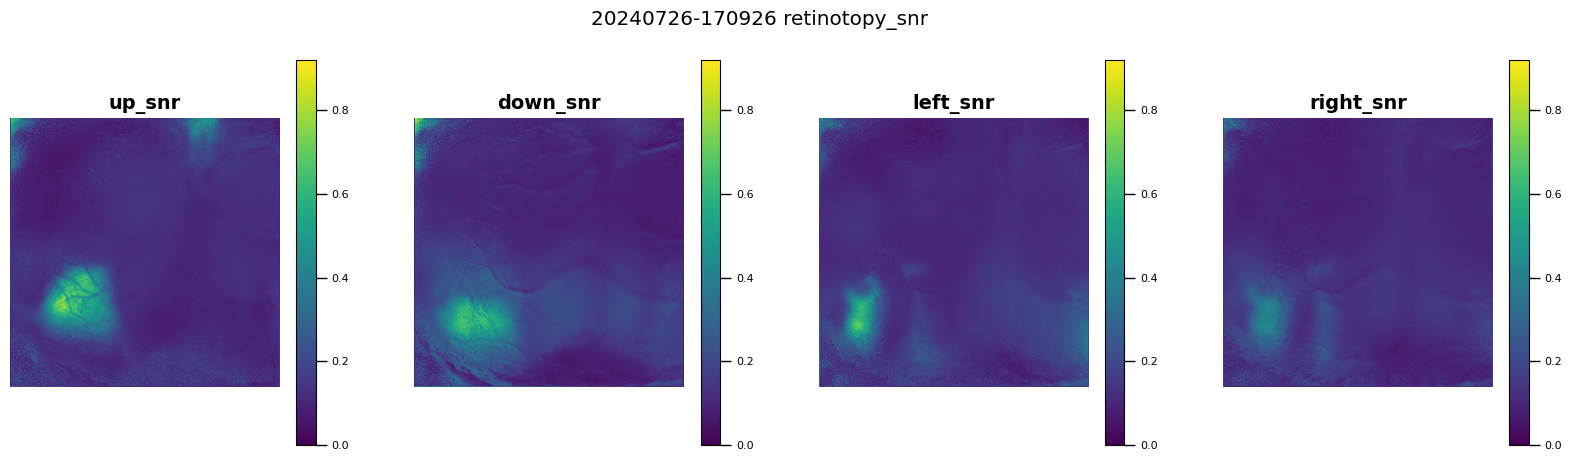

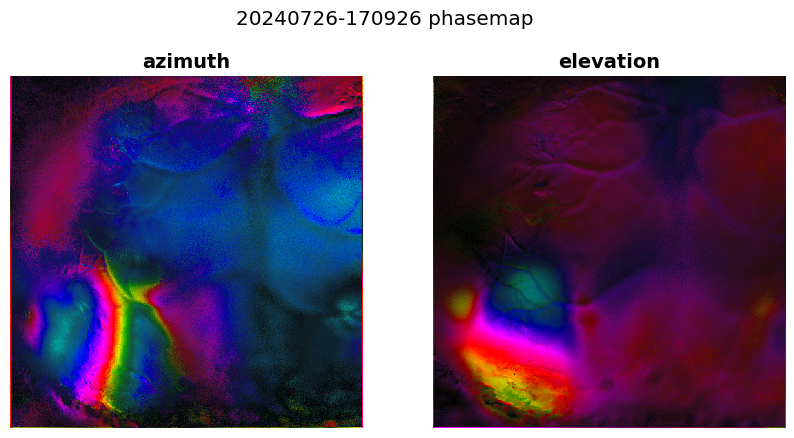

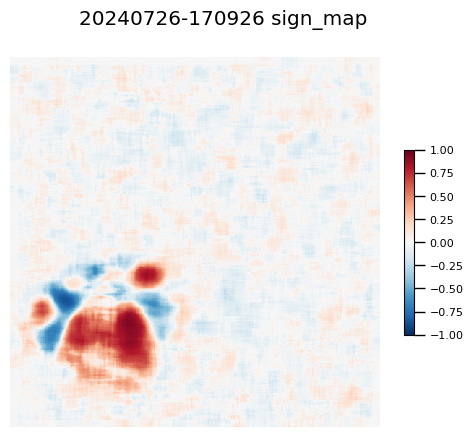

FileNotFoundError: [Errno 2] No such file or directory: '/home/lzx/data/WF_WRX/P42/20240726/DOM/1_Retinotopy/process/20240726-170926-retinotopy/tif/avg_up.tif'

In [16]:
from wfield_utils import *

for path_wfield in path_wfield_all:
    if 'retinotopy' or 'checkerboard-bar' in path_wfield:
        phasemap(path_wfield, nrepeats=10, post_trial=3, export_ave_tif=False, export_raw_tif=False, 
         plot_snr=True, plot_phasemasp=True, export_phase=True)
        phasemap(path_wfield, nrepeats=10, post_trial=0, export_ave_tif=True, export_raw_tif=True, 
         plot_snr=False, plot_phasemasp=False, export_phase=False)